379904
-0.01678466796875
lambda 1 = 3.5810481909598546
lambda 2 = 1.8931435775999035


/home/btamm12/.local/lib/python3.6/site-packages/ipykernel_launcher.py:55: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/home/btamm12/.local/lib/python3.6/site-packages/ipykernel_launcher.py:56: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


<IPython.core.display.Javascript object>


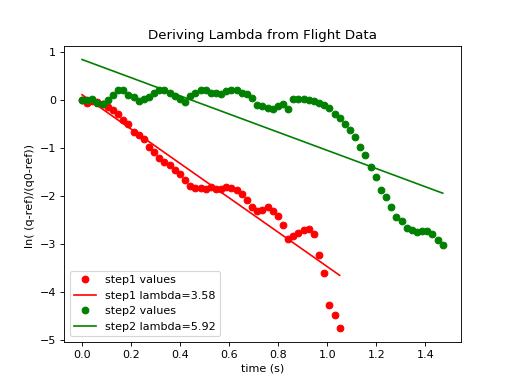

In [1]:
%matplotlib notebook

from DroneLogger import LogEntry
import matplotlib.pyplot as plt
import numpy as np

with open('/media/btamm12/UbuntuHDD/GitHub/EAGLE/DroneLogs/eagle-2019-03-16.19.00.08-step-resp.dat', 'rb') as file:
    data = file.read()
    entry_size = 4 * 56
    nbytes = len(data)
    print(nbytes)
    nentries = nbytes / entry_size
    entries = []
    for i in range(int(nentries)):
        entries.append(LogEntry(data[i * entry_size:(i+1)*entry_size]))
        
    LogEntry.attitude_observer_state
    LogEntry.frametime
    LogEntry.measurement_location
    LogEntry.reference_orientation
    
    wTimes = np.array(list(map(lambda l: l.frametime, entries)))
    wQ12s = np.array(list(map(lambda l: l.attitude_observer_state, entries)))
    wQrefs = np.array(list(map(lambda l: l.reference_orientation, entries)))
    wXys = np.array(list(map(lambda l: l.measurement_location, entries)))
    
    np.savetxt("wTimes.csv", wTimes, delimiter=",")
    np.savetxt("wQ12s.csv", wQ12s, delimiter=",")
    np.savetxt("wQrefs.csv", wQrefs, delimiter=",")
    np.savetxt("wXys.csv", wXys, delimiter=",")

    times = list(map(lambda l: l.frametime, entries))
    q2refs = list(map(lambda l: l.reference_orientation[2], entries))
    q2s = list(map(lambda l: l.attitude_observer_state[2], entries))
    
    print(times[500] - times[501])
    
    step1start = 1124
    step1end = 1175
    step2start = 1249 # 1289
    step2end = 1320 # 1330
    
    step1r = q2refs[step1start:step1end]
    step2r = q2refs[step2start:step2end]
    step1q = q2s[step1start:step1end]
    step2q = q2s[step2start:step2end]

    step1 = list(map(lambda q, r: np.log(abs((q-r)/(step1q[0]-r))), step1q, step1r))
    step2 = list(map(lambda q, r: np.log(abs((q-r)/(step2q[0]-r))), step2q, step2r))
    ts1 = np.array(range(len(step1))) * (5.0/238.0)
    ts2 = np.array(range(len(step2))) * (5.0/238.0)

    a1 = np.array([ ts1, np.ones(len(ts1)) ])
    a2 = np.array([ ts2, np.ones(len(ts2)) ])
    m1, c1 = np.linalg.lstsq(a1.T, step1)[0]
    m2, c2 = np.linalg.lstsq(a2.T, step2)[0]

    print('lambda 1 = ' + str(-m1))
    print('lambda 2 = ' + str(-m2))
    
    line1 = m1*ts1 + c1
    line2 = m2*ts2 + c2
    
    plt.plot(ts1, step1, 'or')
    plt.plot(ts1, line1, '-r')
    plt.plot(ts2, step2, 'og')
    plt.plot(ts2, line2, '-g')
    plt.xlabel('time (s)')
    plt.ylabel('ln( (q-ref)/(q0-ref)) ')
    plt.legend(['step1 values', 'step1 lambda=3.58', 'step2 values', 'step2 lambda=5.92'])
    plt.title('Deriving Lambda from Flight Data')
    plt.show()

379904
lambda 1 = 3.5810481909598546
lambda 2 = 5.924878512525437


/home/btamm12/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/home/btamm12/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


<IPython.core.display.Javascript object>


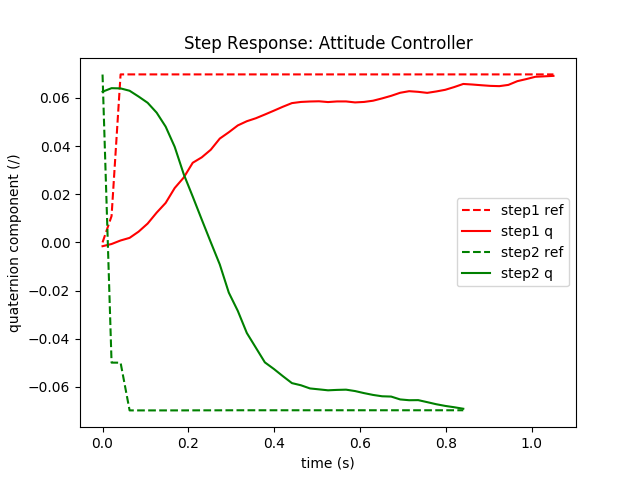

In [32]:
%matplotlib notebook

from DroneLogger import LogEntry
import matplotlib.pyplot as plt
import numpy as np

with open('/media/btamm12/UbuntuHDD/GitHub/EAGLE/DroneLogs/eagle-2019-03-16.19.00.08-step-resp.dat', 'rb') as file:
    data = file.read()
    entry_size = 4 * 56
    nbytes = len(data)
    print(nbytes)
    nentries = nbytes / entry_size
    entries = []
    for i in range(int(nentries)):
        entries.append(LogEntry(data[i * entry_size:(i+1)*entry_size]))
        
    times = list(map(lambda l: l.frametime, entries))
    q2refs = list(map(lambda l: l.reference_orientation[2], entries))
    q2s = list(map(lambda l: l.attitude_observer_state[2], entries))
    
    step1start = 1124
    step1end = 1175
    step2start = 1289
    step2end = 1330
    
    step1r = q2refs[step1start:step1end]
    step2r = q2refs[step2start:step2end]
    step1q = q2s[step1start:step1end]
    step2q = q2s[step2start:step2end]

    step1 = list(map(lambda q, r: np.log(abs((q-r)/(step1q[0]-r))), step1q, step1r))
    step2 = list(map(lambda q, r: np.log(abs((q-r)/(step2q[0]-r))), step2q, step2r))
    ts1 = np.array(range(len(step1))) * (5.0/238.0)
    ts2 = np.array(range(len(step2))) * (5.0/238.0)

    a1 = np.array([ ts1, np.ones(len(ts1)) ])
    a2 = np.array([ ts2, np.ones(len(ts2)) ])
    m1, c1 = np.linalg.lstsq(a1.T, step1)[0]
    m2, c2 = np.linalg.lstsq(a2.T, step2)[0]

    print('lambda 1 = ' + str(-m1))
    print('lambda 2 = ' + str(-m2))
    
    line1 = m1*ts1 + c1
    line2 = m2*ts2 + c2
    
    plt.plot(ts1, step1r, '--r')
    plt.plot(ts1, step1q, '-r')
    plt.plot(ts2, step2r, '--g')
    plt.plot(ts2, step2q, '-g')
    plt.xlabel('time (s)')
    plt.ylabel('quaternion component (/)')
    plt.legend(['step1 ref', 'step1 q', 'step2 ref', 'step2 q'])
    plt.title('Step Response: Attitude Controller')
    plt.show()